In [2]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import math
# from google.colab.patches import cv2_imshow
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
smiley_img = "Pictures\Smiley.png" #link to the smiley image
add_img1="Pictures\img1.png" #link to image which is to be added
add_img2="Pictures\img2.png" #link to image which is to be added
spatial_img = "Pictures\spatial.png" #link to image which is to be filtered

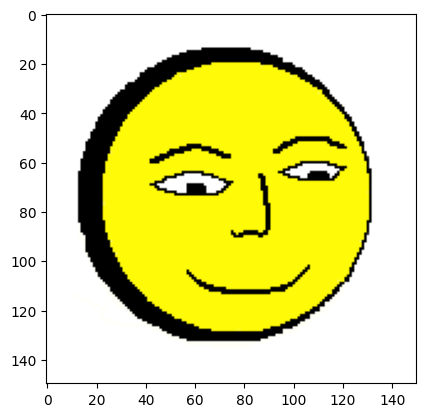

In [4]:
#function to convert image to array
def getPixels(filename):
    img = Image.open(filename, 'r')
    w, h = img.size
    pix = list(img.getdata())
    return [pix[n:n+w] for n in range(0, w*h, w)]

smiley_arr = getPixels(smiley_img) #storing this in an array
# print(smiley_arr)
plt.imshow(smiley_arr) #printing the picture converted from array

In [5]:
add_arr1=getPixels(add_img1) #array for image which is to be added
add_arr2=getPixels(add_img2) #array for image which is to be added
spatial_arr = getPixels(spatial_img) #array for image which is to be filtered

In [6]:
#function to get RGB values from Integer
def getRGBfromI(RGBint):
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return (red, green, blue)

#function to get Integer from RGB values
def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

#function to implement getIfromRGB()
def single_value(array):
  arr_ = [[0 for j in range(len(array[i]))] for i in range(len(array))]
  for i in range(len(array)):
    for j in range(len(array[i])):
      arr_[i][j] = getIfromRGB(array[i][j])
  return arr_

#function to implement getRGBfromI()
def multi_value(array):
  arr_ = [[[0 for k in range(3)] for j in range(len(array[i]))] for i in range(len(array))]
  for i in range(len(array)):
    for j in range(len(array[i])):
      arr_[i][j] = getRGBfromI(array[i][j])
  return arr_

#function to get grayscale value from rgb
def getGrayfromRGB(rgb):
    return int(0.2989*rgb[0] + 0.5870*rgb[1] + 0.1140*rgb[2])

#function to implement getGrayfromRGB()
def gray_value(array):
  arr = [[[0,0,0] for j in range(len(array[i]))] for i in range(len(array))]
  for i in range(len(array)):
    for j in range(len(array[i])):
      arr[i][j][0] = getGrayfromRGB(array[i][j])
      arr[i][j][1] = getGrayfromRGB(array[i][j])
      arr[i][j][2] = getGrayfromRGB(array[i][j])
  return arr

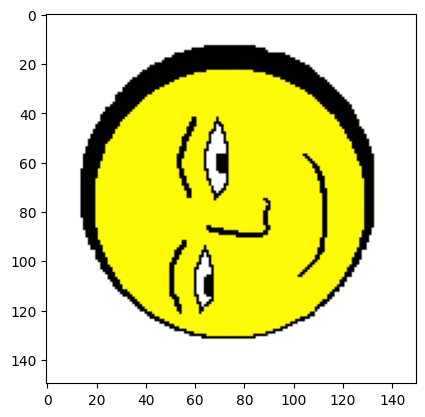

In [7]:
transpose_arr = np.transpose(single_value(smiley_arr))
plt.imshow(multi_value(transpose_arr)) #printing the picture converted from array

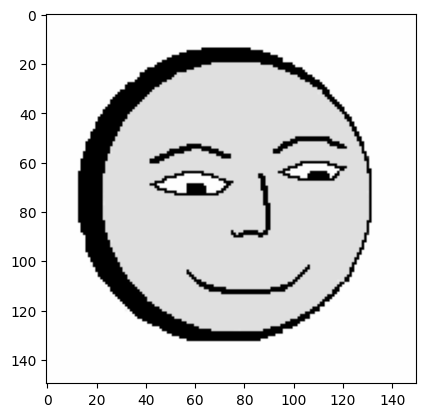

In [8]:
plt.imshow(gray_value(smiley_arr))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


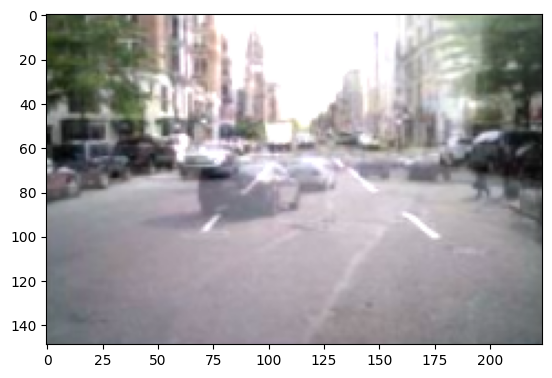

In [10]:
#function to add/merge two images
def add_image(arr1,arr2):
  ans_arr=[[[0 for k in range(3)] for j in range(len(arr1[i]))] for i in range(len(arr1))]
  for i in range(len(arr1)):
    for j in range(len(arr1[i])):
      ans_arr[i][j][0] = arr1[i][j][0] + arr2[i][j][0]
      ans_arr[i][j][1] = arr1[i][j][1] + arr2[i][j][1]
      ans_arr[i][j][2] = arr1[i][j][2] + arr2[i][j][2]
  return ans_arr

addition_arr=add_image(add_arr1,add_arr2)
# plt.imshow(np.array(add_arr1))
# plt.imshow(np.array(add_arr2))
plt.imshow(addition_arr)

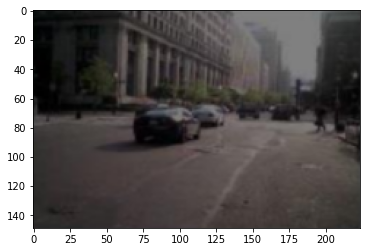

In [ ]:
#function to remove 1 image from the merged image
def sub_image(arr1,arr2):
  ans_arr=[[[0 for k in range(3)] for j in range(len(arr1[i]))] for i in range(len(arr1))]
  for i in range(len(arr1)):
    for j in range(len(arr1[i])):
      ans_arr[i][j][0] = abs(arr1[i][j][0] - arr2[i][j][0])
      ans_arr[i][j][1] = abs(arr1[i][j][1] - arr2[i][j][1])
      ans_arr[i][j][2] = abs(arr1[i][j][2] - arr2[i][j][2])

  return ans_arr

sub_array=sub_image(addition_arr, add_arr1)
plt.imshow(sub_array)

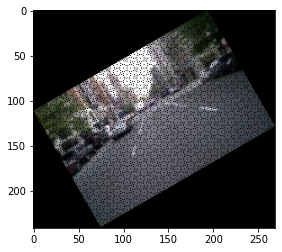

In [ ]:
def rotate(image,angle):
  image = np.array(image)
  angle=math.radians(angle) #converting degrees to radians
  cosine=math.cos(angle)
  sine=math.sin(angle)
  height = image.shape[0] #define the height of the image
  width = image.shape[1] #define the width of the image

  #Define the height and width of the new image that is to be formed
  new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
  new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

  #define another image variable of dimensions of new_height and new _column filled with zero  
  output=[[[0 for k in range(3)] for j in range(new_width)] for i in range(new_height)]

  # Find the centre of the image about which we have to rotate the image
  original_centre_height = round(((image.shape[0]+1)/2)-1)
  original_centre_width = round(((image.shape[1]+1)/2)-1) 

  # Find the centre of the new image that will be obtained
  new_centre_height= round(((new_height+1)/2)-1)
  new_centre_width= round(((new_width+1)/2)-1)  

  for i in range(height):
      for j in range(width):
          #co-ordinates of pixel with respect to the centre of original image
          y=image.shape[0]-1-i-original_centre_height                   
          x=image.shape[1]-1-j-original_centre_width                      

          #co-ordinate of pixel with respect to the rotated image
          new_y=round(-x*sine+y*cosine) 
          new_x=round(x*cosine+y*sine)  

          #since image will be rotated the centre will change too, so to adust to that we will need to change new_x and new_y with respect to the new centre
          new_y=new_centre_height-new_y
          new_x=new_centre_width-new_x

          # adding if check to prevent any errors in the processing
          if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
              output[new_y][new_x][0]=image[i][j][0] 
              output[new_y][new_x][1]=image[i][j][1] 
              output[new_y][new_x][2]=image[i][j][2] 
  return output

rotate_arr1=rotate(add_arr1,30)
plt.imshow(rotate_arr1)

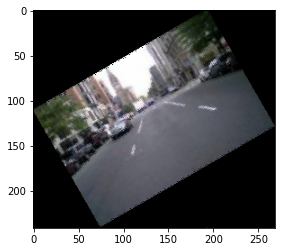

In [ ]:
import math
def rotate1(image,angle):
  image = np.array(image)
  angle=math.radians(angle) #converting degrees to radians
  cosine=math.cos(angle)
  sine=math.sin(angle)
  height=image.shape[0]     #define the height of the image
  width=image.shape[1]      #define the width of the image

  #Define the height and width of the new image that is to be formed
  new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
  new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

  #define another image variable of dimensions of new_height and new _column filled with zero  
  output=[[[0 for k in range(3)] for j in range(new_width)] for i in range(new_height)]

  # Find the centre of the image about which we have to rotate the image
  original_centre_height = round(((image.shape[0]+1)/2)-1)
  original_centre_width = round(((image.shape[1]+1)/2)-1) 

  # Find the centre of the new image that will be obtained
  new_centre_height= round(((new_height+1)/2)-1)
  new_centre_width= round(((new_width+1)/2)-1)  

  for i in range(height):
      for j in range(width):
          #co-ordinates of pixel with respect to the centre of original image
          y=image.shape[0]-1-i-original_centre_height                   
          x=image.shape[1]-1-j-original_centre_width                      

          #co-ordinate of pixel with respect to the rotated image
          new_y=round(-x*sine+y*cosine) 
          new_y1=round(-x*sine+y*cosine) +1
          new_x=round(x*cosine+y*sine)  
          new_x1=round(x*cosine+y*sine) +1

          #since image will be rotated the centre will change too, so to adust to that we will need to change new_x and new_y with respect to the new centre
          new_y=new_centre_height-new_y
          new_y1=new_centre_height-new_y1
          new_x=new_centre_width-new_x
          new_x1=new_centre_width-new_x1

          # adding if check to prevent any errors in the processing
          if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
              output[new_y][new_x][0]=image[i][j][0] 
              output[new_y][new_x][1]=image[i][j][1] 
              output[new_y][new_x][2]=image[i][j][2] 
              output[new_y1][new_x1][0]=image[i][j][0] 
              output[new_y1][new_x1][1]=image[i][j][1] 
              output[new_y1][new_x1][2]=image[i][j][2] 
  return output

rotate_arr=rotate1(add_arr1,30)
plt.imshow(rotate_arr)

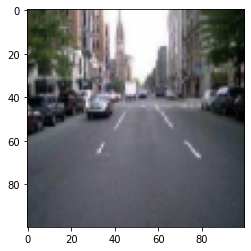

In [ ]:
def resize(image, nrow, ncol):
  image = np.array(image)
  rows = image.shape[0]
  cols = image.shape[1]
  return([[ image[int(rows * r / nrow)][int(cols * c / ncol)] for c in range(ncol)] for r in range(nrow)])

resize_arr = resize(add_arr1, 100, 100)
plt.imshow(resize_arr)

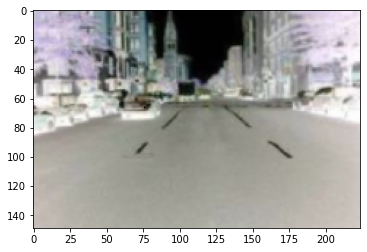

In [ ]:
def negative(image):
  copy = np.array(image)
  for i in range(len(copy)):
    for j in range(len(copy[i])):
      copy[i][j][0] = 255-copy[i][j][0]
      copy[i][j][1] = 255-copy[i][j][1]
      copy[i][j][2] = 255-copy[i][j][2]
  return copy

neg_arr = negative(add_arr1)
plt.imshow(neg_arr)

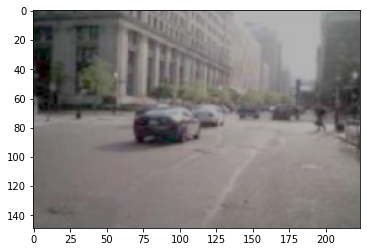

In [ ]:
def gamma(image):
  copy = np.array(image)
  gm = 0.5
  for i in range(len(copy)):
    for j in range(len(copy[i])):
      copy[i][j][0] = int(255*((copy[i][j][0]/255)**gm))
      copy[i][j][1] = int(255*((copy[i][j][1]/255)**gm))
      copy[i][j][2] = int(255*((copy[i][j][2]/255)**gm))
  return copy

gamma_arr = gamma(add_arr2)
plt.imshow(gamma_arr)

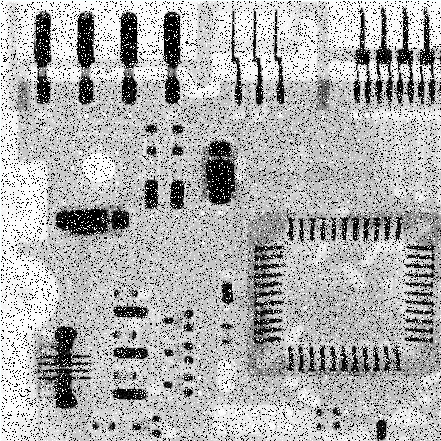

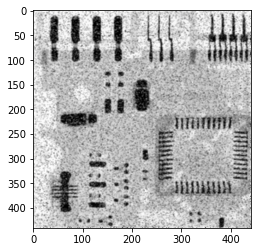

In [ ]:
def averaging_filter(image):

  copy = np.array(image)

  var = 1/9

  gm = 1

  for i in range(1,len(copy)-1):
    for j in range(1,len(copy[i])-1):

      copy[i][j][0] = int((image[i-1][j-1][0] + image[i-1][j][0] + image[i-1][j+1][0] + 
                           image[i][j-1][0] + image[i][j-1][0] + image[i][j+1][0] + 
                           image[i+1][j-1][0] + image[i+1][j][0] + image[i+1][j+1][0])/9)
      
      copy[i][j][1] = int((image[i-1][j-1][1] + image[i-1][j][1] + image[i-1][j+1][1] + 
                           image[i][j-1][1] + image[i][j-1][1] + image[i][j+1][1] + 
                           image[i+1][j-1][1] + image[i+1][j][1] + image[i+1][j+1][1])/9)
      
      copy[i][j][2] = int((image[i-1][j-1][2] + image[i-1][j][2] + image[i-1][j+1][2] + 
                           image[i][j-1][2] + image[i][j-1][2] + image[i][j+1][2] + 
                           image[i+1][j-1][2] + image[i+1][j][2] + image[i+1][j+1][2])/9)

  return copy

cv2_imshow(np.array(spatial_arr))
avg_fil_arr = averaging_filter(spatial_arr)
plt.imshow(avg_fil_arr)

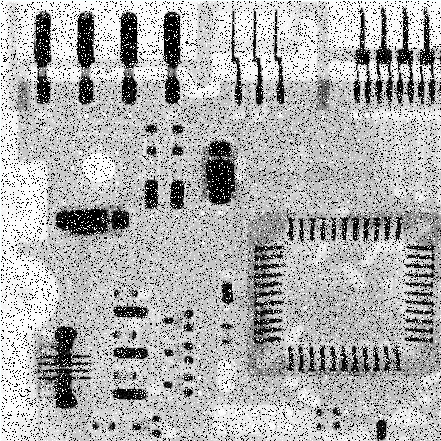

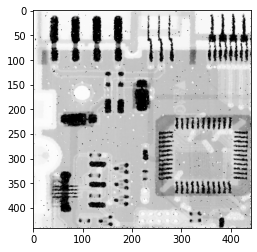

In [ ]:
def median_filter(image):

  m = np.array(image).shape[0] 
  n = np.array(image).shape[1] 
  # copy = [[[255 for k in range(3)] for j in range(n)] for i in range(m)]
  copy = np.array(image)

  var = 1/9

  for i in range(1,len(copy)-1):
    for j in range(1,len(copy[i])-1):
      temp0 = sorted([image[i-1][j-1][0] , image[i-1][j][0] ,  image[i-1][j+1][0] , 
                      image[i][j-1][0] ,  image[i][j][0] , image[i][j+1][0] , 
                      image[i+1][j-1][0] , image[i+1][j][0] , image[i+1][j+1][0]])[4]

      temp1 = sorted([image[i-1][j-1][1] , image[i-1][j][1] , image[i-1][j+1][1] , 
                      image[i][j-1][1] , image[i][j-1][1] , image[i][j+1][1] , 
                      image[i+1][j-1][1] , image[i+1][j][1] , image[i+1][j+1][1]])[4]

      temp2 = sorted([image[i-1][j-1][2] , image[i-1][j][2] , image[i-1][j+1][2] , 
                      image[i][j-1][2] , image[i][j-1][2] , image[i][j+1][2] , 
                      image[i+1][j-1][2] , image[i+1][j][2] , image[i+1][j+1][2]])[4]

      copy[i][j][0] = temp0
      copy[i][j][1] = temp1
      copy[i][j][2] = temp2
  return copy

cv2_imshow(np.array(spatial_arr))
median_fil_arr = median_filter(spatial_arr)
plt.imshow(median_fil_arr)